In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('opcode_results/ST.csv')

In [3]:
def plot_target_vs_each_feature(X: pd.DataFrame, y: pd.Series):
    y_vals = y.values.reshape(-1)
    for col in X.columns:
        x_vals = X[col].values
        plt.figure(figsize=(8, 5))
        plt.scatter(x_vals, y_vals)
        plt.xlabel(col)
        plt.ylabel("ns")
        plt.title(f"ns vs {col}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [ ]:
def analytic_linear_regression(X: pd.DataFrame, y: pd.Series) -> np.ndarray:
    X_mat = X.values
    y_vec = y.values

    n = X_mat.shape[0]
    X_design = np.hstack([X_mat, np.ones((n, 1))])

    beta, _, _, _ = np.linalg.lstsq(X_design, y_vec, rcond=None)

    return beta

In [5]:
def myfunc(df_type: pd.DataFrame):
    X = df_type[["remrefs", "addrefs"]]
    y = df_type["ns"]

    plot_target_vs_each_feature(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    beta = analytic_linear_regression(X_train, y_train)
    
    X_test_mat = X_test.values
    X_test_design = np.hstack([X_test_mat, np.ones((X_test_mat.shape[0], 1))])
    y_pred = X_test_design @ beta
    r2 = r2_score(y_test, y_pred)
    
    return beta, r2

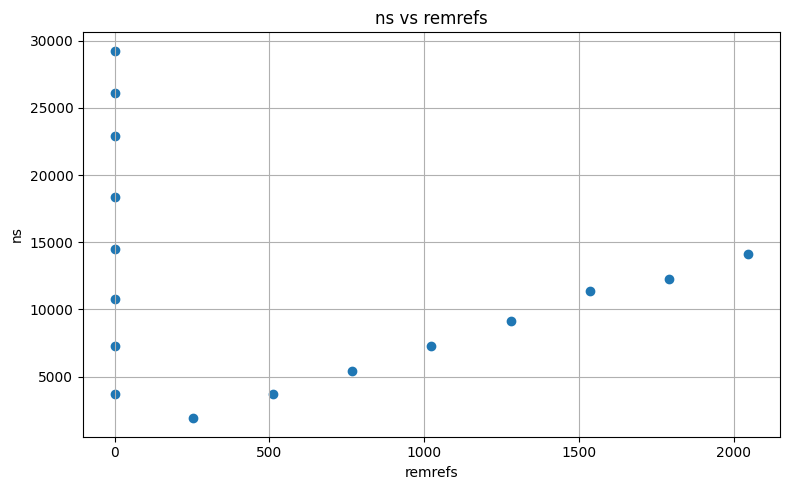

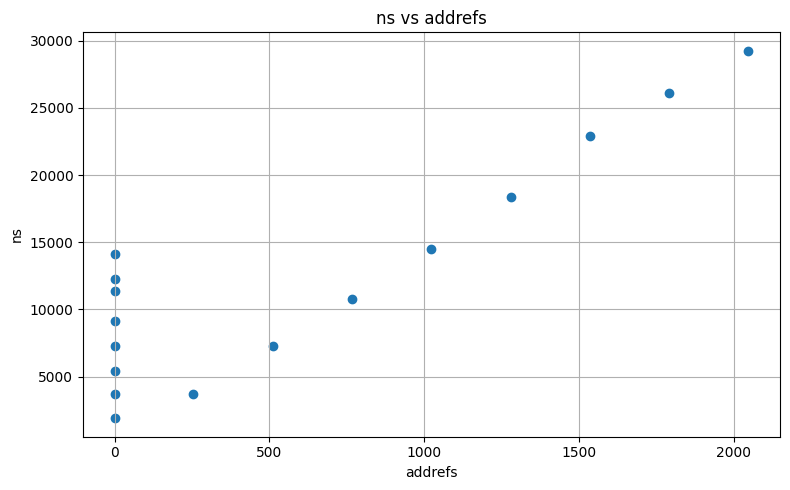

[ 6.89534043 14.22715315 52.47827189]
0.995898394739109


In [6]:
beta, r2 = myfunc(df)
print(beta)
print(r2)